# Kar Epaluesyon Predikciyen

## Read the Dataset

link dataset: https://archive.ics.uci.edu/dataset/19/car+evaluation

In [3]:
import pandas as pd

df = pd.read_csv('https://github.com/najminaak/car-epaluesyon-datacet/raw/main/car-evaluation/car.data', delimiter=',')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


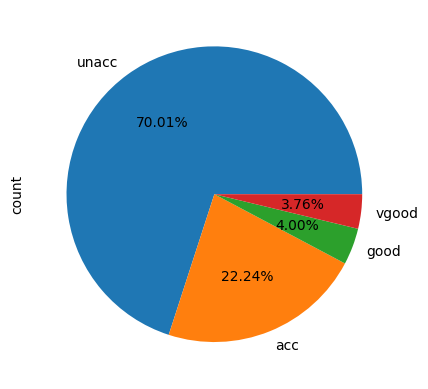

In [7]:
import matplotlib.pyplot as plt
data = df['class'].value_counts()
data.plot(kind='pie',autopct='%1.2f%%')
plt.show()

## Check Missing Values

In [8]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


## Check Duplicate Values

In [9]:
df.duplicated().sum()

np.int64(0)

## Data Preprosessing

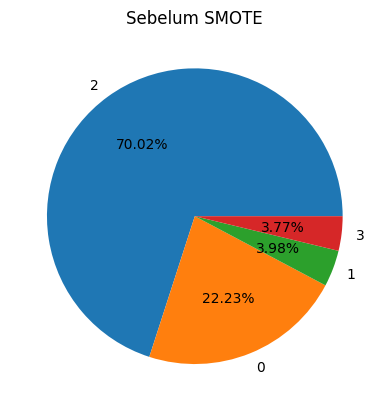

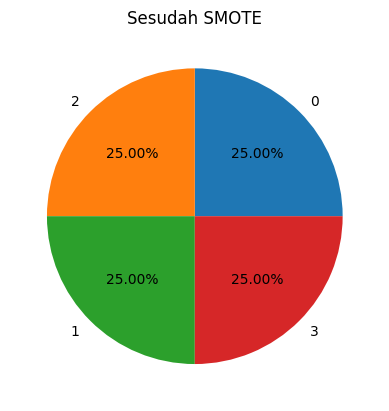

=== SEBELUM SCALING ===


,buying,maint,doors,persons,lug_boot,safety
0,2,2,3,4,2,2
1,2,3,3,2,1,2
2,1,3,5,5,1,2
3,2,1,2,4,2,3
4,1,4,4,2,2,3


=== SESUDAH SCALING ===


,buying,maint,doors,persons,lug_boot,safety
0,0.102062,0.058919,-0.373054,-0.158332,-0.168864,-0.593754
1,0.102062,1.032850,-0.373054,-2.341683,-1.457156,-0.593754
2,-0.863161,1.032850,1.422805,0.933343,-1.457156,-0.593754
3,0.102062,-0.915011,-1.270984,-0.158332,-0.168864,0.847954
4,-0.863161,2.006780,0.524876,-2.341683,-0.168864,0.847954


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Ordinal Encoding untuk fitur dengan urutan logis
# hapus spasi dan ubah ke lowercase
for col in ['buying','maint','lug_boot','safety']:
    df[col] = df[col].str.strip().str.lower()

ordinal_mapping = {
    'buying': {'low':1, 'med':2, 'high':3, 'vhigh':4},
    'maint': {'low':1, 'med':2, 'high':3, 'vhigh':4},
    'lug_boot': {'small':1, 'med':2, 'big':3},
    'safety': {'low':1, 'med':2, 'high':3}
}

for col, mapping in ordinal_mapping.items():
    df[col] = df[col].map(mapping)

# 2. Numeric-like categorical feature
# untuk fitur yang merepresentasikan jumlah bukan ranking subjektif
# (ubah ke angka atau integer, bukan ordinal murni)
df['doors'] = df['doors'].replace({'5more':5}).astype(int)
df['persons'] = df['persons'].replace({'more':5}).astype(int)

# 3. Label Encoding untuk target variabel
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# TRAIN TEST SPLIT
# Pisahkan fitur dan target 80:20
df_X = df.drop('class', axis=1)
df_y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42, stratify=df_y
)

# SMOTE diterapkan pada data train sebelum scaling
# Menambah data pada kelas yang jumlahnya sedikit (minoritas), supaya seimbang dengan kelas lain
# Kenapa SMOTE dulu?
# Karena fitur dalam dataset ini semuanya berasal dari kategori ordinal yang hanya diubah menjadi angka, bukan angka yang punya makna besaran sesungguhnya
# SMOTE menambah data minoritas bukan dengan meng-copy, tapi dengan membuat data sintetis baru hasil interpolasi dari dua data minoritas yang mirip.
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scaling
# Menyamakan skala semua fitur agar model tidak bingung karena skala angka berbeda
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# GRAFIK PERBANDINGAN
before_counts = y_train.value_counts(normalize=True)
after_counts = y_train_res.value_counts(normalize=True)

# Pie chart sebelum SMOTE
plt.figure()
plt.pie(before_counts, labels=before_counts.index.astype(str), autopct='%1.2f%%')
plt.title('Sebelum SMOTE')
plt.show()

# Pie chart sesudah SMOTE
plt.figure()
plt.pie(after_counts, labels=after_counts.index.astype(str), autopct='%1.2f%%')
plt.title('Sesudah SMOTE')
plt.show()

# Sebelum scaling
df_before = pd.DataFrame(X_train_res[:5], columns=df_X.columns)

# Sesudah scaling
df_after = pd.DataFrame(X_train_res_scaled[:5], columns=df_X.columns)

print("=== SEBELUM SCALING ===")
display(df_before)

print("=== SESUDAH SCALING ===")
display(df_after)

## Pemodelan

### Logistic Regression

Accuracy      : 0.8410404624277457
Precision     : 0.6974782127208821
Recall        : 0.8989079102715466
F1-score      : 0.7682617394817396
Confusion matrix:
 [[ 57   4   8   8]
 [  0  14   0   0]
 [ 27   6 207   2]
 [  0   0   0  13]]


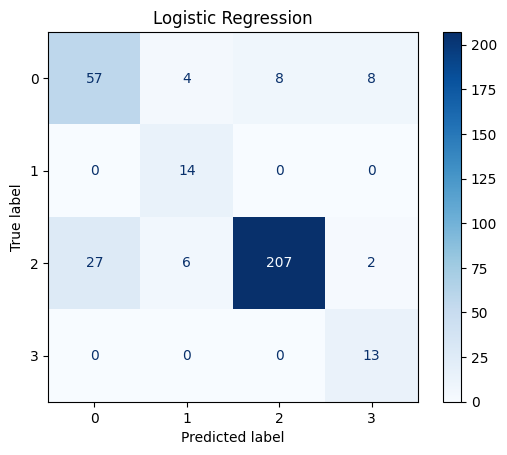

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

model = LogisticRegression(class_weight='balanced',    # Secara otomatis memberi bobot lebih besar ke kelas yang jumlahnya sedikit (minoritas), untuk mengatasi ketidakseimbangan kelas, agar model tidak hanya fokus ke kelas mayoritas
                           random_state=42,            # Mengunci proses random agar hasilnya konsisten/reproducible. saat dijalankan ulang, hasilnya tetap sama
                           max_iter=1000)              # Untuk memastikan model Logistic Regression benar-benar konvergen. Nilai default 100 kadang tidak cukup, apalagi setelah SMOTE. Dengan 1000, model lebih stabil dan tidak muncul warning
model.fit(X_train_res_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression")
plt.show()


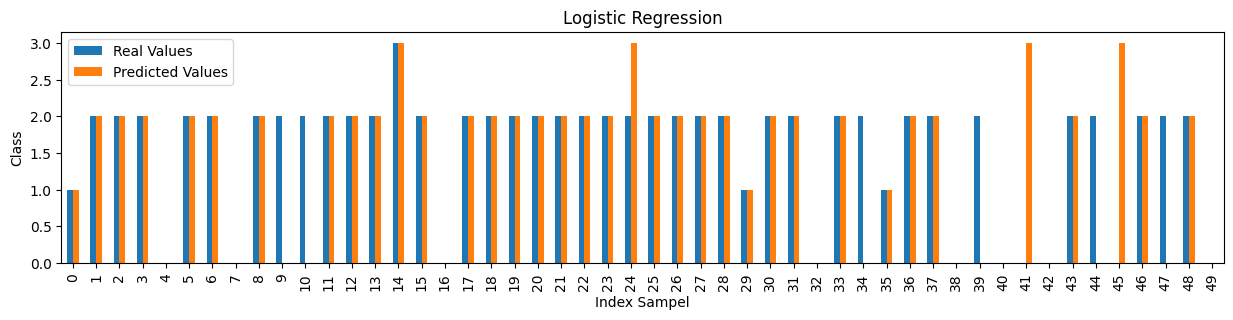

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("Logistic Regression")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### K Nearest Neighbour

Accuracy      : 0.9277456647398844
Precision     : 0.8795656028368795
Recall        : 0.9653187721369539
F1-score      : 0.9175873900012812
Confusion matrix:
 [[ 73   2   0   2]
 [  0  14   0   0]
 [ 21   0 221   0]
 [  0   0   0  13]]


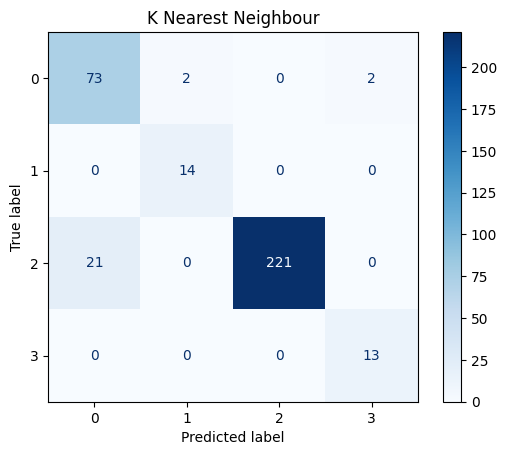

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train_res_scaled, y_train_res)

y_pred = model.predict(X_test_scaled)

# Evaluasi model
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("K Nearest Neighbour")
plt.show()


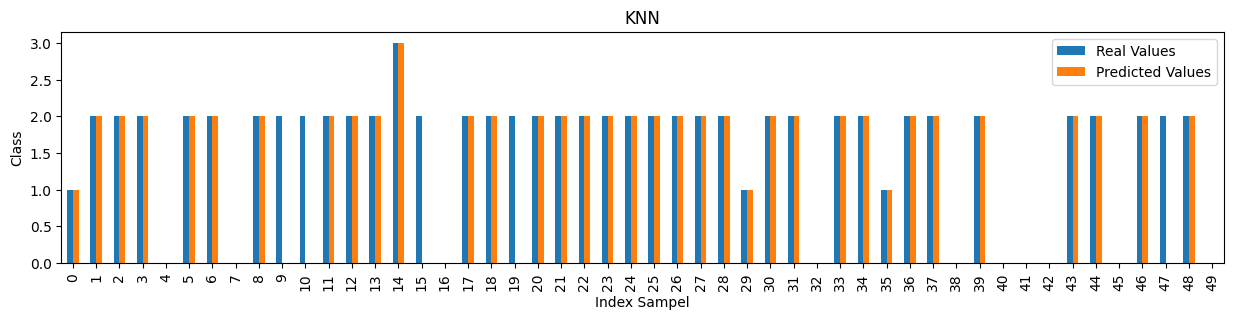

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("KNN")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### Decision Tree

Accuracy      : 0.9682080924855492
Precision     : 0.9064636752136752
Recall        : 0.9637975660702933
F1-score      : 0.9315192574754225
Confusion matrix:
 [[ 74   2   0   1]
 [  0  14   0   0]
 [  5   2 235   0]
 [  1   0   0  12]]


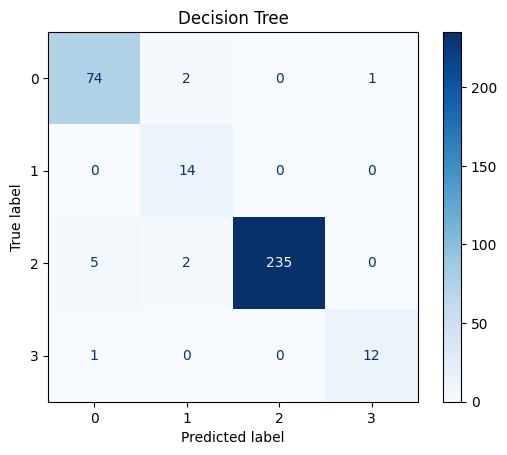

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Model Decision Tree
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train_res_scaled, y_train_res)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree")
plt.show()


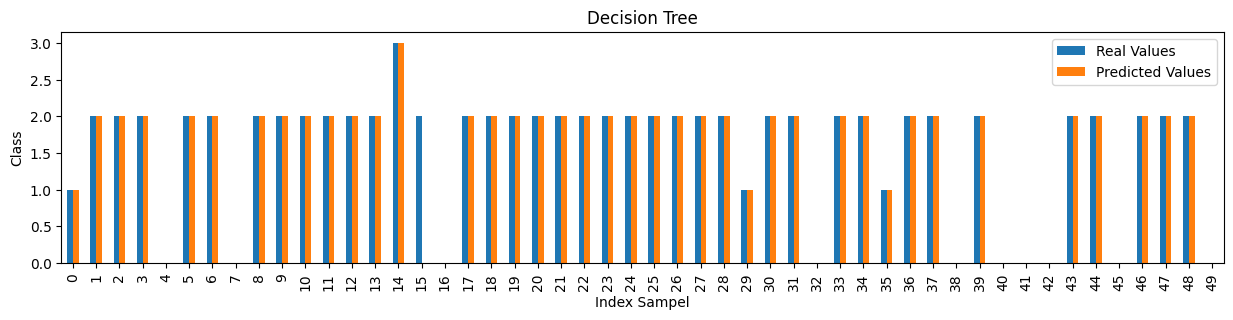

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("Decision Tree")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### Random Forest

Accuracy      : 0.9710982658959537
Precision     : 0.9279142924976258
Recall        : 0.964830623921533
F1-score      : 0.9451417039786301
Confusion matrix:
 [[ 74   2   0   1]
 [  0  14   0   0]
 [  6   0 236   0]
 [  1   0   0  12]]


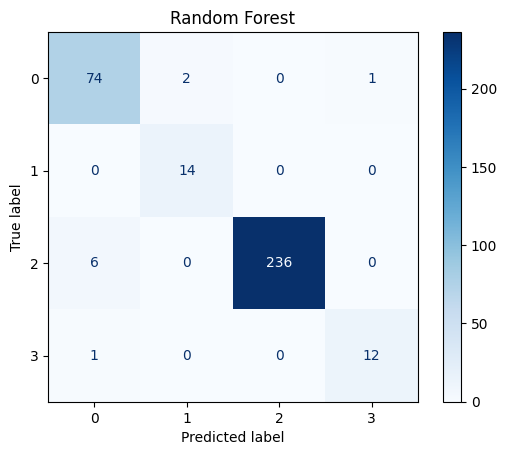

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train_res_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest")
plt.show()

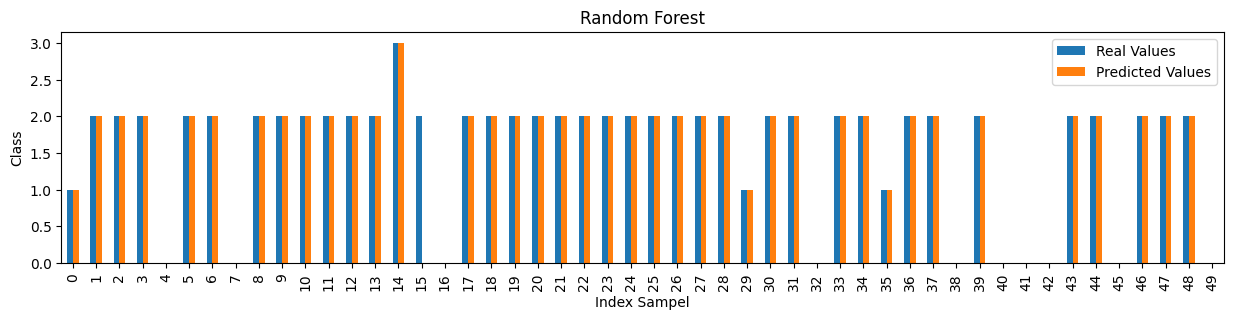

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("Random Forest")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### AdaBoost

Accuracy      : 0.838150289017341
Precision     : 0.6612937975456716
Recall        : 0.8703342112433021
F1-score      : 0.7286156513833336
Confusion matrix:
 [[ 61   6   3   7]
 [  0  14   0   0]
 [ 26   5 204   7]
 [  0   2   0  11]]


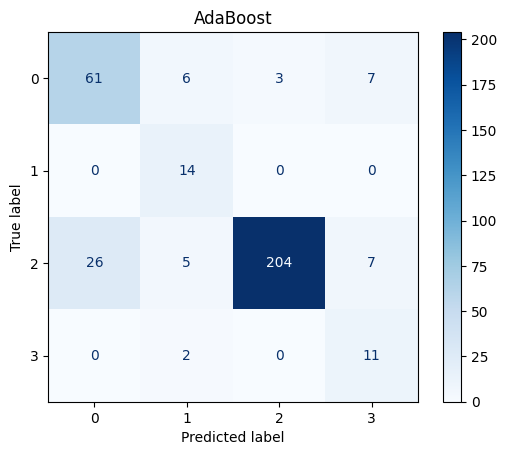

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

model = AdaBoostClassifier(
    n_estimators=50,
    random_state=42
)
model.fit(X_train_res_scaled, y_train_res)
y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("AdaBoost")
plt.show()


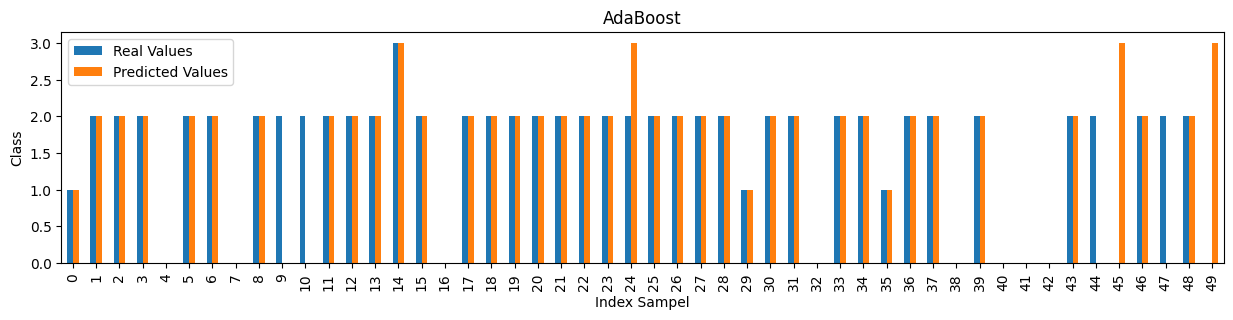

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("AdaBoost")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### XGBoost

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:01:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy      : 0.9797687861271677
Precision     : 0.953125
Recall        : 0.9883412042502951
F1-score      : 0.9695772331777545
Confusion Matrix:
 [[ 75   2   0   0]
 [  0  14   0   0]
 [  5   0 237   0]
 [  0   0   0  13]]


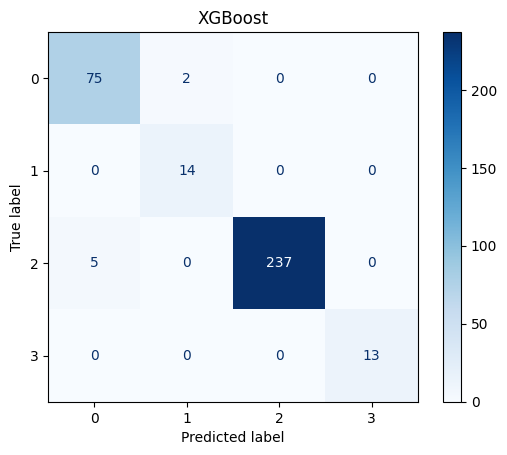

In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train_res_scaled, y_train_res)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost")
plt.show()


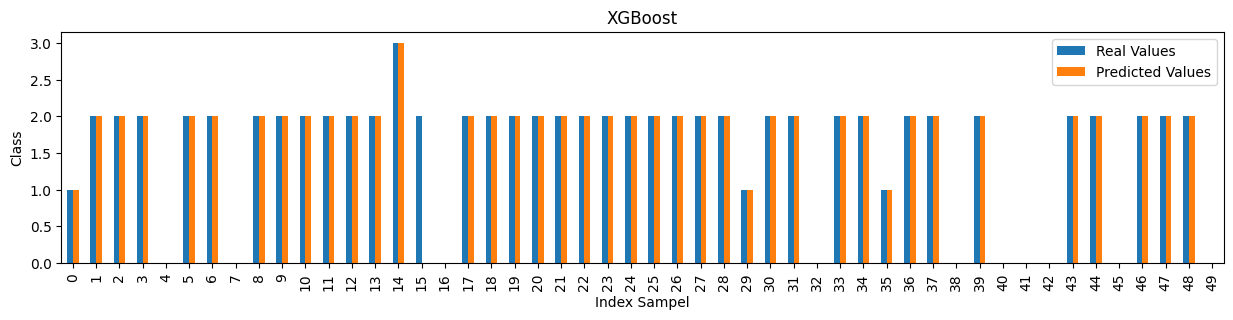

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("XGBoost")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 3868, number of used features: 6
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

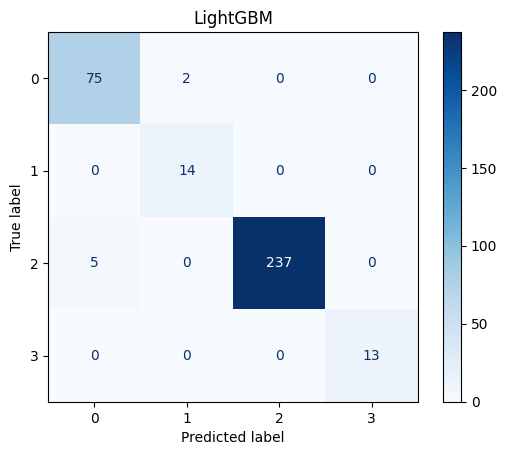

In [23]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay

model_lgb = lgb.LGBMClassifier(
    random_state=42,           # memastikan setiap kali model dilatih dengan data yang sama, hasilnya tetap sama
    max_depth=5,               # menentukan kedalaman maksimum tiap pohon, supaya tidak terlalu dalam, sehingga membantu mencegah overfitting
    min_child_samples=20,      # minimal data di leaf agar split dilakukan.
    num_leaves=31,             # jumlah maksimum leaf per pohon
    learning_rate=0.1,         # kecepatan model belajar tiap pohon
    n_estimators=100           # jumlah pohon yang dibuat
)
model_lgb.fit(X_train_res_scaled, y_train_res)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
print('Accuracy      :', accuracy_score(y_test, y_pred))
print('Precision     :', precision_score(y_test, y_pred, average='macro'))
print('Recall        :', recall_score(y_test, y_pred, average='macro'))
print('F1-score      :', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("LightGBM")
plt.show()


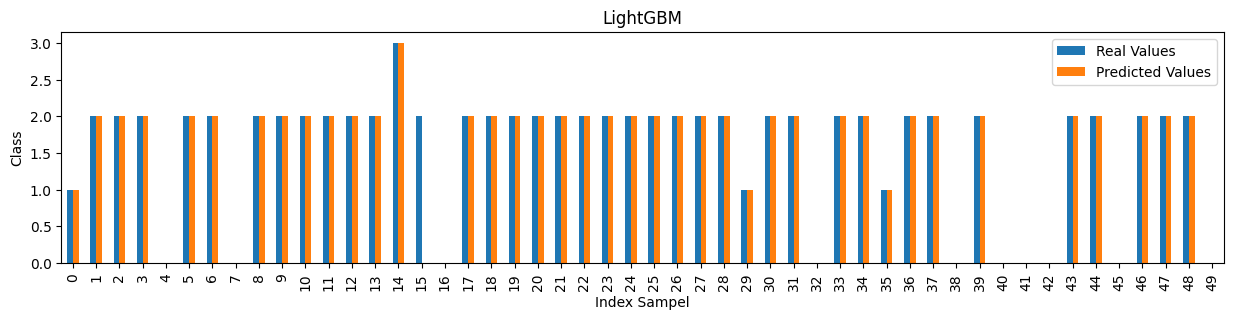

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.Series(np.array(y_test)[:50], name='Real Values')
data2 = pd.Series(np.array(y_pred)[:50], name='Predicted Values')

df_new = pd.DataFrame({'Real Values': data1, 'Predicted Values': data2})

df_new.plot(kind='bar', figsize=(15,3))
plt.title("LightGBM")
plt.xlabel('Index Sampel')
plt.ylabel('Class')
plt.show()


### Perbandingan

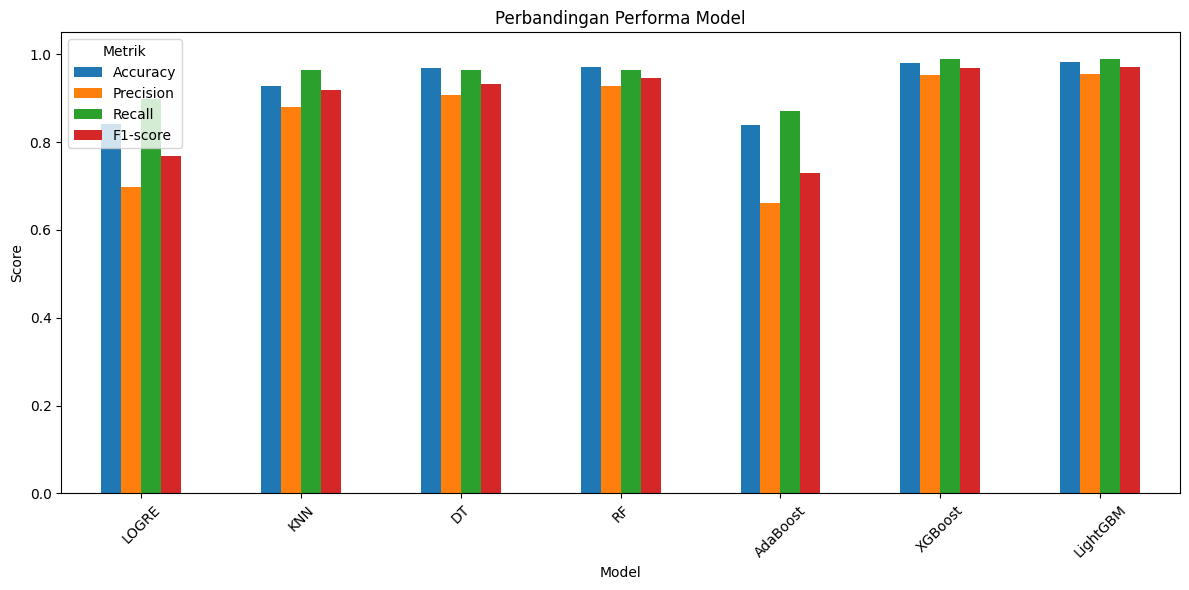

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Model': ['LOGRE', 'KNN', 'DT', 'RF', 'AdaBoost', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.8410, 0.9277, 0.9682, 0.9711, 0.8382, 0.9798, 0.9827],
    'Precision': [0.6975, 0.8796, 0.9065, 0.9279, 0.6613, 0.9531, 0.9561],
    'Recall': [0.8989, 0.9653, 0.9638, 0.9648, 0.8703, 0.9883, 0.9894],
    'F1-score': [0.7683, 0.9176, 0.9315, 0.9451, 0.7286, 0.9696, 0.9716]
}

df = pd.DataFrame(data)

# Set index menjadi model
df.set_index('Model', inplace=True)

# Plot
ax = df.plot(kind='bar', figsize=(12,6))
plt.title("Perbandingan Performa Model")
plt.ylabel("Score")
plt.ylim(0, 1.05)  # Skala y dari 0 sampai 1
plt.xticks(rotation=45)
plt.legend(title='Metrik')
plt.tight_layout()
plt.show()


## Prediksi Data Baru


In [37]:
import pandas as pd
import difflib
import pickle

# input baru
new_input_raw = {
    "buying": "med",
    "maint": "med",
    "doors": "5more",
    "persons": "more",
    "lug_boot": "big",
    "safety": "high"
}

# helper singkat untuk mapping ordinal & numeric-like
def map_val(feature, v):
    s = str(v).strip().lower()
    if feature in ['buying','maint','lug_boot','safety']:
        keys = list(ordinal_mapping[feature].keys())
        if s in keys:
            return ordinal_mapping[feature][s]
        m = difflib.get_close_matches(s, keys, n=1, cutoff=0.6)
        if m: return ordinal_mapping[feature][m[0]]
        raise ValueError(f"Invalid value for {feature}: {v}")
    if feature == 'doors':
        return 5 if s == '5more' else int(''.join(filter(str.isdigit, s)))
    if feature == 'persons':
        return 5 if s == 'more' else int(''.join(filter(str.isdigit, s)))
    raise KeyError(feature)

# ubah ke numeric sesuai preprocessing Anda
row = {
    'buying': map_val('buying', new_input_raw['buying']),
    'maint':  map_val('maint',  new_input_raw['maint']),
    'doors':  map_val('doors',  new_input_raw['doors']),
    'persons':map_val('persons',new_input_raw['persons']),
    'lug_boot':map_val('lug_boot',new_input_raw['lug_boot']),
    'safety': map_val('safety', new_input_raw['safety'])
}

X_new_df = pd.DataFrame([row], columns=['buying','maint','doors','persons','lug_boot','safety'])

# ambil model/label encoder/scaler dari namespace
_model = globals().get('model_lgb') or globals().get('model')
_le = globals().get('label_encoder') or globals().get('le')
_scaler = globals().get('scaler')

if _model is None or _le is None or _scaler is None:
    raise RuntimeError("Pastikan 'model_lgb' atau 'model', 'label_encoder' atau 'le', dan 'scaler' sudah didefinisikan.")

# scaling -> prediksi -> inverse label
X_new_scaled = _scaler.transform(X_new_df)
X_new_scaled_df = pd.DataFrame(X_new_scaled, columns=X_new_df.columns)

y_new_enc = _model.predict(X_new_scaled_df)
y_new_label = _le.inverse_transform(y_new_enc.astype(int))

print("Input mentah:", new_input_raw)
print("Setelah preprocessing:", X_new_df.to_dict(orient='records')[0])
print("Prediksi (encoded):", y_new_enc)
print("Prediksi (label):", y_new_label[0])

# =========================
# Simpan menggunakan pickle
# =========================
bundle = {
    'model': _model,
    'scaler': _scaler,
    'label_encoder': _le,
    'ordinal_mapping': ordinal_mapping
}

with open("car_bundle.sav", "wb") as f:
    pickle.dump(bundle, f)

print("Semua objek disimpan ke file car_bundle.sav")


Input mentah: {'buying': 'med', 'maint': 'med', 'doors': '5more', 'persons': 'more', 'lug_boot': 'big', 'safety': 'high'}
Setelah preprocessing: {'buying': 2, 'maint': 2, 'doors': 5, 'persons': 5, 'lug_boot': 3, 'safety': 3}
Prediksi (encoded): [3]
Prediksi (label): vgood
Semua objek disimpan ke file car_bundle.sav
